In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd

current_directory = os.getcwd()
path = os.path.join(current_directory, 'data_records')
path = 'c:\\Users\\sebas\\Documents\\GitHub\\ClimAIte\\data_records'
os.chdir(path)
record = os.path.join(path, 'record_7')
print(os.listdir())

df = pd.read_csv(record)

['record_0', 'record_1', 'record_2', 'record_3', 'record_4', 'record_5', 'record_6', 'record_7', 'record_extra30']


In [4]:
df.sample(10)
df[ df['idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor'] < 1].sort_values('Fitness Score').head(8)
# df[ df['Fitness Score'] < 0.01].corr()
# df.plot.scatter(x = 'Unique Name', y = 'Fitness Score')
# df[ df['Fitness Score'] < 1].plot.scatter(x = 'Unique Name', y = 'Fitness Score')

,Unnamed: 0,Generation,Parent1,Parent2,Unique Name,Fitness Score,kWh result,idf.People.People_5a9ee43c.People_per_Floor_Area,idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area,idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor,idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient,idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance,idf.Material.Generic Gypsum Board.Specific_Heat,idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness
102,102,3,2-4,2-1,3-6,0.0018,18.183328,0.10,6,0.00028,0.5,0.7,3,2400,0.62
213,213,6,5-10,5-16,6-21,0.0050,18.297217,0.10,10,0.00018,0.7,0.3,19,2400,0.64
177,177,5,4-31,4-20,5-17,0.0067,18.308328,0.10,9,0.00018,0.7,0.3,7,1600,0.52
183,183,5,4-20,4-7,5-23,0.0174,18.358328,0.22,9,0.00026,0.7,0.3,7,2400,0.52
109,109,3,2-8,2-28,3-13,0.0264,18.388884,0.10,7,0.00002,0.7,0.4,11,2400,0.54
176,176,5,4-20,4-24,5-16,0.0274,18.391662,0.10,10,0.00018,0.7,0.3,19,2400,0.52
60,60,1,0-13,0-29,1-28,0.0394,18.027773,0.12,9,0.00018,0.7,0.4,11,600,0.40
89,89,2,1-2,1-30,2-25,0.0941,17.919439,0.22,10,0.00018,0.7,0.3,7,1700,0.52


In [8]:
list(df.columns)

['Unnamed: 0',
 'Generation',
 'Parent1',
 'Parent2',
 'Unique Name',
 'Fitness Score',
 'kWh result',
 'idf.People.People_5a9ee43c.People_per_Floor_Area',
 'idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area',
 'idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area',
 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor',
 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient',
 'idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance',
 'idf.Material.Generic Gypsum Board.Specific_Heat',
 'idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness']

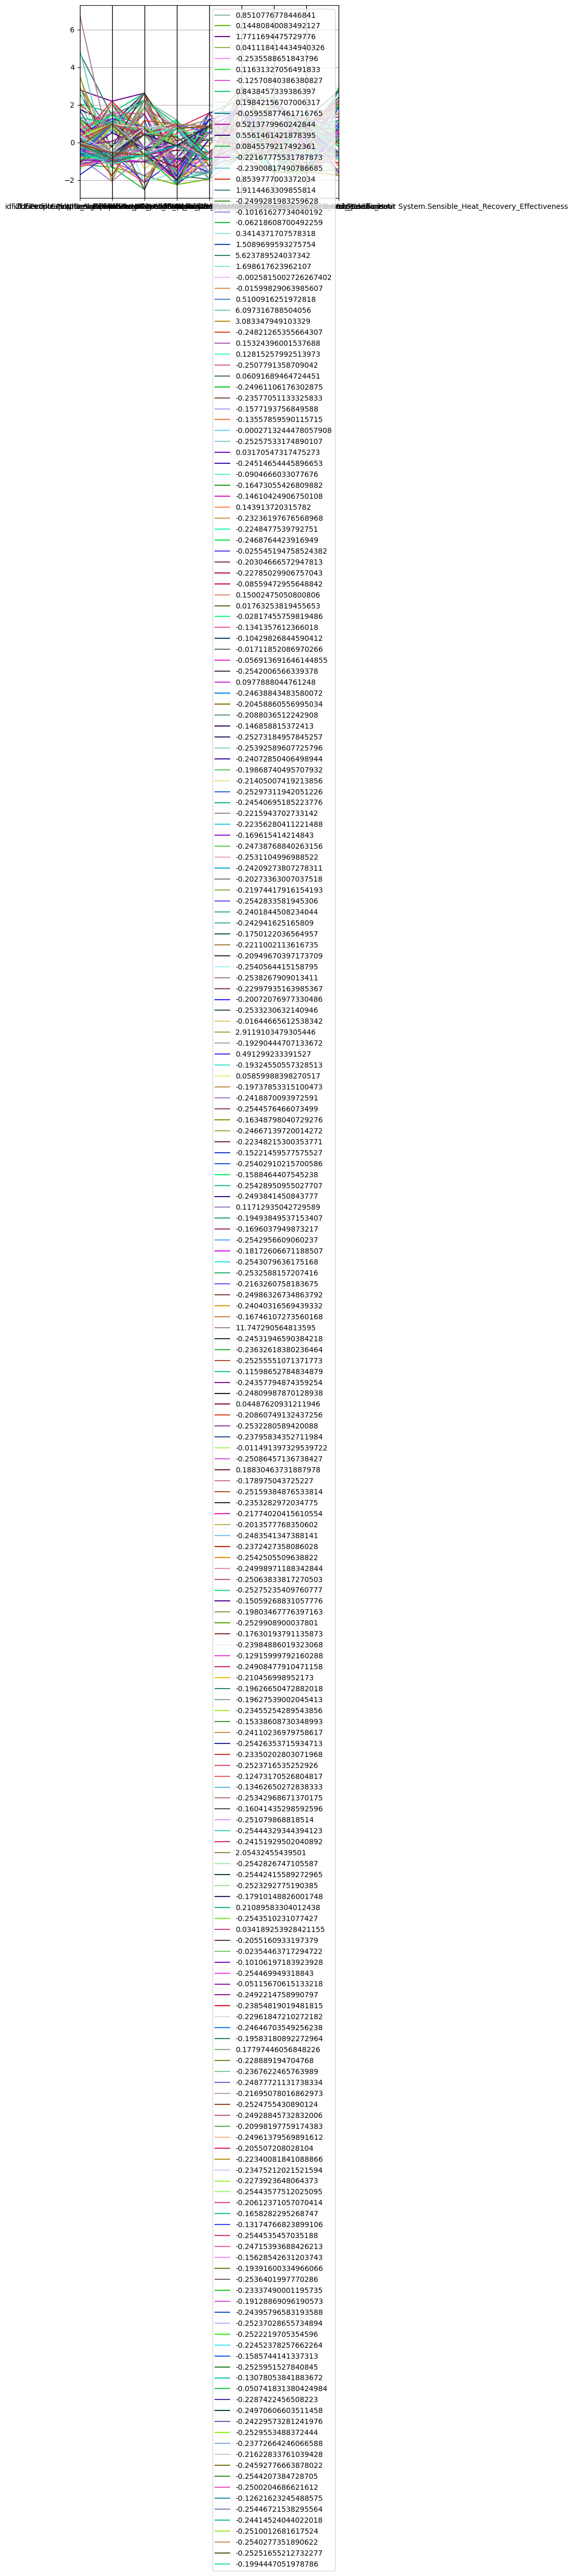

<Figure size 30000x20000 with 0 Axes>

In [21]:
# import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data = df.drop(['Unnamed: 0',
 'Generation',
 'Parent1',
 'Parent2', 'Unique Name'], axis=1) #pandas.read_csv(r'C:\Python27\Lib\site-packages\pandas\tests\data\iris.csv', sep=',')
normalized_df=(data-data.mean())/data.std()

parallel_coordinates(normalized_df, 'Fitness Score')
plt.figure(figsize=(300,200))
plt.show()

['idf.People.People_5a9ee43c.People_per_Floor_Area', 'idf.ElectricEquipment.Equipment_d01c6929.Watts_per_Zone_Floor_Area', 'idf.ZoneInfiltration:DesignFlowRate.Infiltration_d1fbaf75.Flow_Rate_per_Exterior_Surface_Area', 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.UFactor', 'idf.WindowMaterial:SimpleGlazingSystem.PH_Window.Solar_Heat_Gain_Coefficient', 'idf.Material:NoMass.Typical Insulation-R50.Thermal_Resistance', 'idf.Material.Generic Gypsum Board.Specific_Heat', 'idf.ZoneHVAC:IdealLoadsAirSystem.Z1_Ground_Floor_48970ba6 Ideal Loads Air System.Sensible_Heat_Recovery_Effectiveness']


c:\ProgramData\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


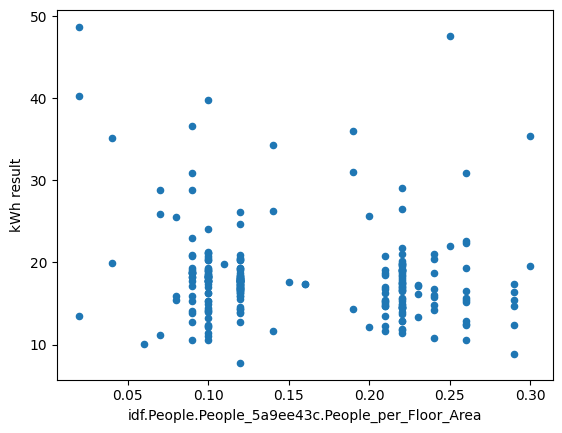

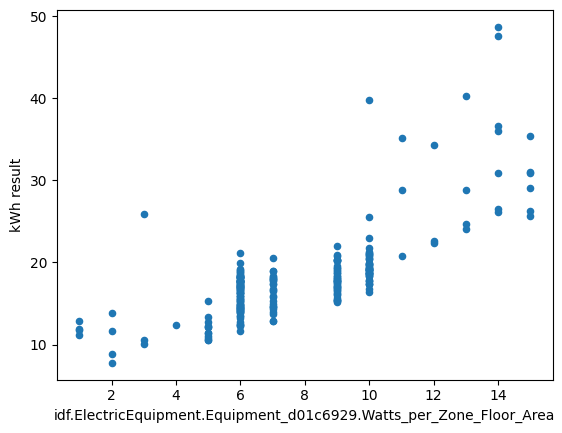

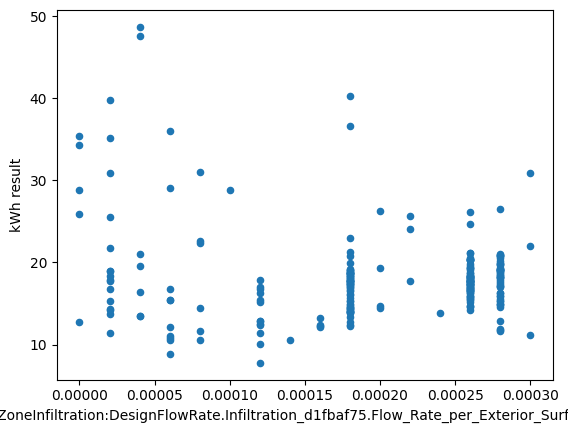

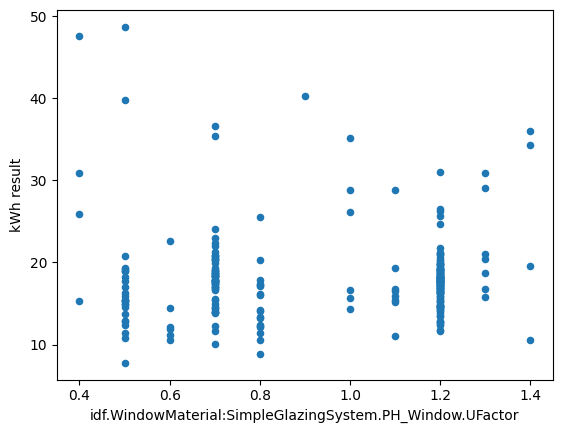

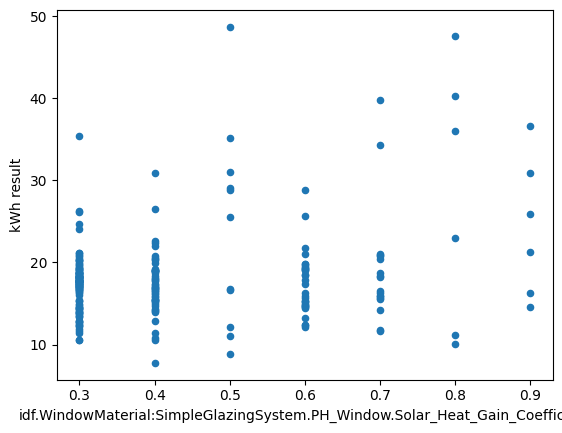

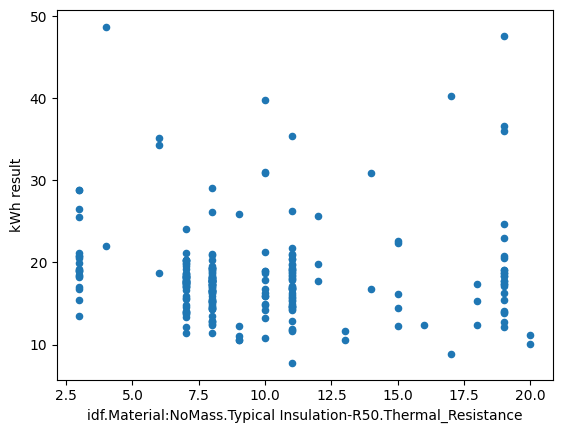

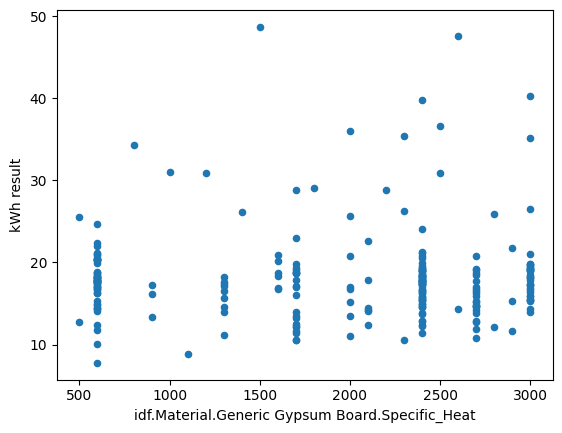

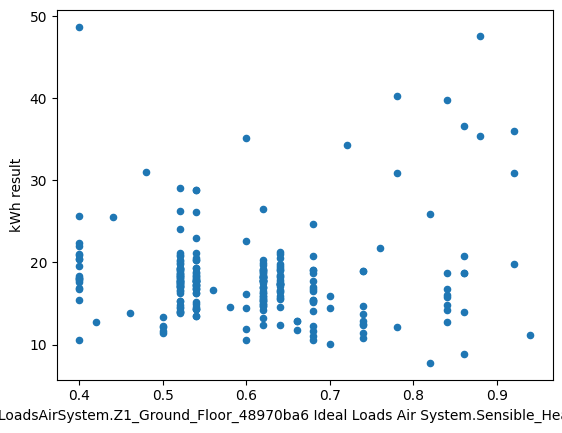

In [ ]:
# note, lower fitness score is better

df_idf = df.filter(regex='idf', axis=1)
names = df_idf.columns.values.tolist()
print(names)
for i in names:
    df[ df['Fitness Score'] < 1000.01].plot.scatter(x=i, y='kWh result')#.set_ylim(ymin=0, ymax=0.2)